In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('cumbres.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
0,26/01/2018,17:00,350,32,1.86,10.8,15.1,61,934.8,0.0,259.3,18.4,61,6,12.6
1,26/01/2018,18:00,32,13,5.78,21.2,16.8,57,933.8,0.0,294.0,21.0,52,6,12.7
2,26/01/2018,19:00,27,30,10.60,25.6,18.2,54,932.6,0.0,283.5,22.4,46,6,12.9
3,26/01/2018,20:00,27,20,11.41,25.2,18.1,55,931.8,0.0,185.0,21.0,47,5,13.2
4,26/01/2018,21:00,28,16,12.36,22.3,18.2,55,931.2,0.0,186.2,20.9,48,6,13.5


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
TEMPCOMB      float64
HUMCOMB         int64
HUMSUBS         int64
TEMPSUBS      float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)


In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA
0,350,32,1.86,10.8,15.1,61,934.8,0.0,259.3,18.4,61,6,12.6,2018-01-26 17:00:00
1,32,13,5.78,21.2,16.8,57,933.8,0.0,294.0,21.0,52,6,12.7,2018-01-26 18:00:00
2,27,30,10.60,25.6,18.2,54,932.6,0.0,283.5,22.4,46,6,12.9,2018-01-26 19:00:00
3,27,20,11.41,25.2,18.1,55,931.8,0.0,185.0,21.0,47,5,13.2,2018-01-26 20:00:00
4,28,16,12.36,22.3,18.2,55,931.2,0.0,186.2,20.9,48,6,13.5,2018-01-26 21:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.00000,167.000000,167.000000,167.000000
mean,150.323353,136.850299,5.362695,15.483832,13.641916,64.143713,935.971856,0.002395,120.681437,14.07485,61.844311,5.838323,13.949701
std,103.239940,106.078490,4.858394,10.221542,6.773552,26.667130,4.629748,0.021821,200.619023,8.69988,24.396320,0.369261,1.294701
min,0.000000,2.000000,0.240000,4.300000,-1.100000,18.000000,928.400000,0.000000,0.000000,-2.40000,14.000000,5.000000,11.300000
25%,32.000000,30.000000,2.055000,7.200000,8.750000,39.500000,932.300000,0.000000,0.000000,7.70000,42.000000,6.000000,12.950000
50%,162.000000,117.000000,3.090000,11.200000,14.600000,65.000000,936.100000,0.000000,0.000000,14.10000,64.000000,6.000000,14.300000
75%,217.500000,238.000000,7.430000,22.000000,18.150000,87.500000,939.550000,0.000000,187.500000,19.15000,83.000000,6.000000,14.900000
max,359.000000,358.000000,23.510000,41.000000,30.400000,100.000000,945.100000,0.200000,845.200000,34.70000,96.000000,6.000000,16.300000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,TEMPCOMB,HUMCOMB,HUMSUBS,TEMPSUBS,FECHA


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS        150.323353
DIRR        136.850299
VELS          5.362695
VELR         15.483832
TEMP         13.641916
HR           64.143713
PB          935.971856
PREC          0.002395
RADSOL      120.681437
TEMPCOMB     14.074850
HUMCOMB      61.844311
HUMSUBS       5.838323
TEMPSUBS     13.949701
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

13.64191616766467

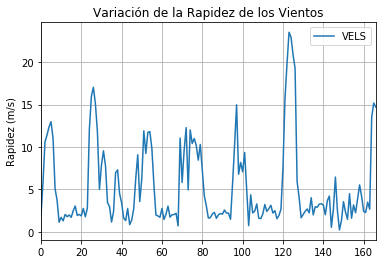

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

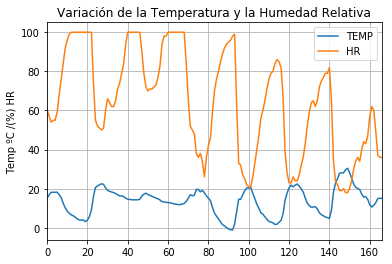

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()


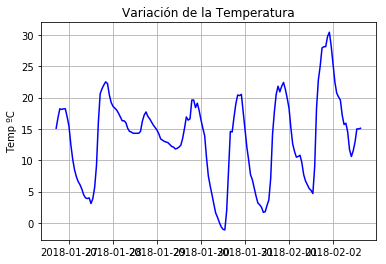

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()